# Admin

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit

In [50]:
# ---- Roadmap ----
#
# 1) wavelengths, start indexes, filename, sheets, columnames
#
# 2) Extract the data from the sheets and export into np.array
#
# 3) Bin the data from each trial into bins at each index
#
# 4) Fit a lorentzian to each data set
#
# 5) extract the peak value and what index this corresponds to
#
# 6) plot this index against the wavelengths and fit a line so that we have our calibration

In [51]:
def chi_squared(model_params, model, x_data, y_data, y_error):
    return(np.sum(((y_data - model(x_data, *model_params))/y_error)**2))

def reduced_chi_squared(Chi_squared, DoF):
    return Chi_squared / (DoF)

def Lorentzian_Function(x,A, x0, B, C):
    return A/(1+((x-x0)/B)**2)+C

# Data Processing

In [52]:
wavelengths = [632.8,  #Red
               594.1,  #Orange
               543.5,  #Green
               ]

start_indexes = [6980,  #Red
                 6935,  #Orange
                 6890,  #Green
                 ]

sheets = ['Red',
          'Orange',
          'Green'
          ]

cols = [
    ['R_A_0', 'R_A_1', 'R_A_2', 'R_A_3', 'R_A_4', 'R_A_5', 'R_A_6', 'R_A_7', 'R_A_8', 'R_A_9'],  #Red
    ['O_A_0', 'O_A_1', 'O_A_2', 'O_A_3', 'O_A_4', 'O_A_5', 'O_A_6', 'O_A_7', 'O_A_8', 'O_A_9'],  # Orange
    ['G_A_0', 'G_A_1', 'G_A_2', 'G_A_3', 'G_A_4']  #Green
]
file = "Calibration_Runs.xlsx"

In [53]:
df_red = pd.read_excel(file, sheet_name=sheets[0])
df_red = df_red.dropna()

red_amplitudes = [df_red[col] for col in cols[0]]
red_amplitudes = np.vstack(red_amplitudes)

red_amplitudes_binned = red_amplitudes.mean(axis=0)
red_amplitudes_uncertainties = red_amplitudes.std(axis = 0, ddof = 1)

index_list = np.arange(len(red_amplitudes_binned))

p0_red = [
    red_amplitudes_binned.max(), #A
    np.argmax(red_amplitudes_binned), #x0
    10, # B (width Guess)
    red_amplitudes_binned.min() #C
]

popt_red, cov_red = curve_fit(
    Lorentzian_Function,
    xdata=index_list,
    ydata=red_amplitudes_binned,
    sigma=red_amplitudes_uncertainties,
    absolute_sigma=True,
    p0=p0_red
)

red_dof = len(red_amplitudes_binned)-len(popt_red)

chi2 = chi_squared(model = Lorentzian_Function,
                   model_params = popt_red,
                   x_data = index_list,
                   y_data = red_amplitudes_binned,
                   y_error = red_amplitudes_uncertainties)

rchi2 = reduced_chi_squared(chi2,
                            DoF = red_dof)

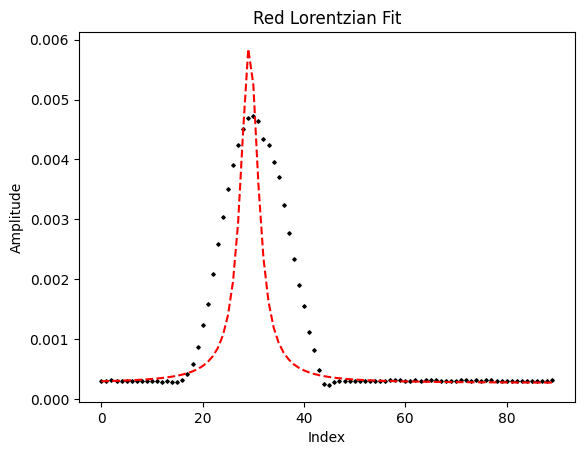

 ---- Results ---- 
The mean index is 29.230037695028408
The reduced Chi2 is 0.9632199728197992
----- ----- -----


In [54]:
plt.figure(1)
plt.scatter(index_list, red_amplitudes_binned, color = 'black', marker= 'D', s=3)
plt.plot(index_list, Lorentzian_Function(index_list, *popt_red), color = 'red', linestyle = '--')

plt.title('Red Lorentzian Fit')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

print(" ---- Results ---- ")
print(f"The mean index is {popt_red[1]}")
print(f"The reduced Chi2 is {rchi2}")
print("----- ----- -----")